# Masking


In [2]:
#Importing the necessary modules
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

# For morphology
from skimage.morphology import erosion, dilation, opening, square, disk, remove_small_holes

# For conversion of images
from skimage.color import rgb2lab, gray2rgb 

# For binarising
from skimage.filters import try_all_threshold, threshold_otsu, threshold_li

# For watershed
from scipy import ndimage as ndi#for distance
from skimage.feature import peak_local_max 
from skimage.segmentation import watershed 
from skimage import measure # measure objects

# For making boxex around the beans
from matplotlib.patches import Rectangle

In [3]:
def get_image(filename):
    """ Using the skimage.io import the image with the file name.
    This function returns the gray image as numpy array """
    
    image_gray = io.imread(filename, as_gray = True) 
    image_RGB = io.imread(filename, as_gray = False) 
    
    return image_gray, image_RGB

# Displaying the final masked results (without shadows)
def display_RGB_n_gray_images():
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6))

    ax[0].imshow(image_RGB)
    ax[0].set_title('Original RGB image', fontsize = 12)

    ax[1].imshow(image_gray, cmap='gray')
    ax[1].set_title('Original Gray image', fontsize = 12)

    for row in ax:
        row.axis('off')

    fig.tight_layout()
    plt.show()

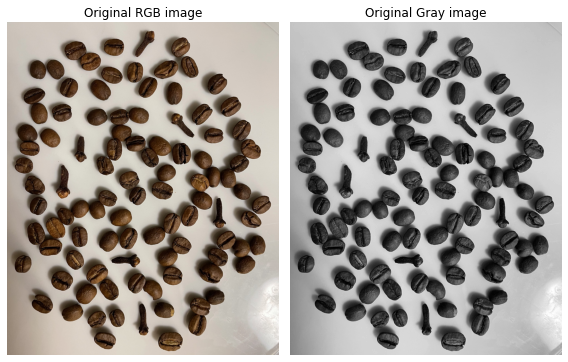

In [4]:
# Getting the image
image_gray, image_RGB = get_image("coffeebeans.jpg")

# Cropping for getting the image without any white background 
image_gray = image_gray[330:3670, 130:2860]    #[Row Y, COL, X]
image_RGB = image_RGB[330:3670, 130:2860]   #[Row Y, COL, X]

# Displaying the images
display_RGB_n_gray_images()

## Masking with shadow

In [5]:
# Binarising the image using the Otsu filter
thresh_with_shadow = threshold_otsu(image_gray)
binary_otsu_with_shadow = image_gray > thresh_with_shadow

# Filling the holes of the objects in the binary image
inverted_binary_otsu = np.invert(binary_otsu_with_shadow)
holes_filled_with_shadow = remove_small_holes(inverted_binary_otsu, area_threshold = 8000)

# Creating the mask with shadows
mask_with_shadow = np.invert(holes_filled_with_shadow)*1.0

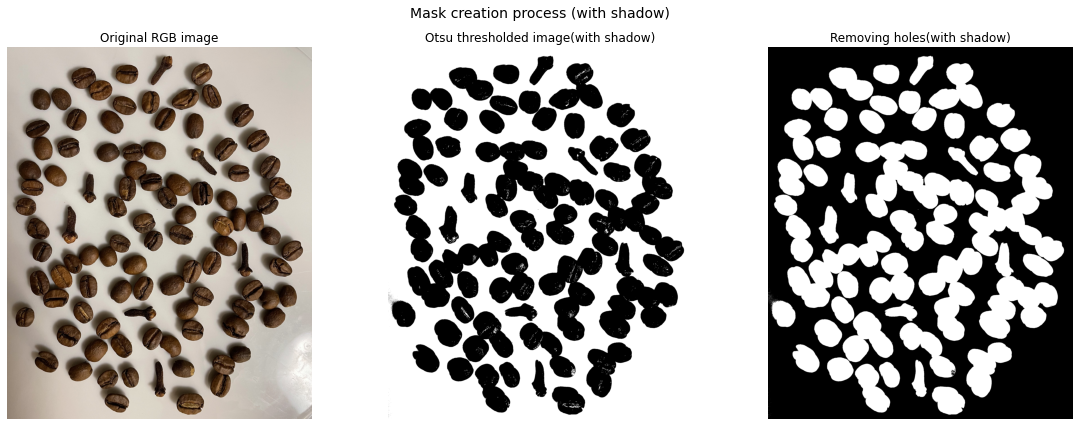

In [6]:
# Displaying the images
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))
fig.suptitle("Mask creation process (with shadow)", fontsize = 14)

ax[0].imshow(image_RGB)
ax[0].set_title('Original RGB image', fontsize = 12)

ax[1].imshow(binary_otsu_with_shadow, cmap='gray')
ax[1].set_title("Otsu thresholded image(with shadow)", fontsize = 12)

ax[2].imshow(holes_filled_with_shadow, cmap='gray')
ax[2].set_title("Removing holes(with shadow)", fontsize = 12)


for row in ax:
    row.axis('off')

fig.tight_layout()
plt.show()

In [7]:
# Function for creating the mask image which takes 2 images as parameters
def masking_image(image_RGB, mask):
    
    RGB_mask = gray2rgb(mask)# Converting the mask from gray to RGB format
    masked_image = image_RGB.copy() # Creating a copy of the RGB image
    
    shape = np.shape(RGB_mask)
    for i in range(shape[0]):
        for j in range(shape[1]):
            a, b, c = RGB_mask[i, j]
            if (a == 1.0) and (b== 1.0) and (c==1.0): # checking if the pixel from the mask is white
                masked_image[i, j] = [255, 255, 255] # Setting the pixel of the RGB to white
    return masked_image

# Displaying the final masked results (without shadows)
def display_mask_results(image_RGB, mask, masked_answer, masking_type = ""):
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 16))

    ax[0].imshow(image_RGB)
    ax[0].set_title('Original RGB image', fontsize = 14)

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title("Mask "+ masking_type, fontsize = 14)

    ax[2].imshow(masked_answer, cmap='gray')
    ax[2].set_title("Masked result " + masking_type , fontsize = 14)

    for row in ax:
        row.axis('off')

    fig.tight_layout()
    plt.show()

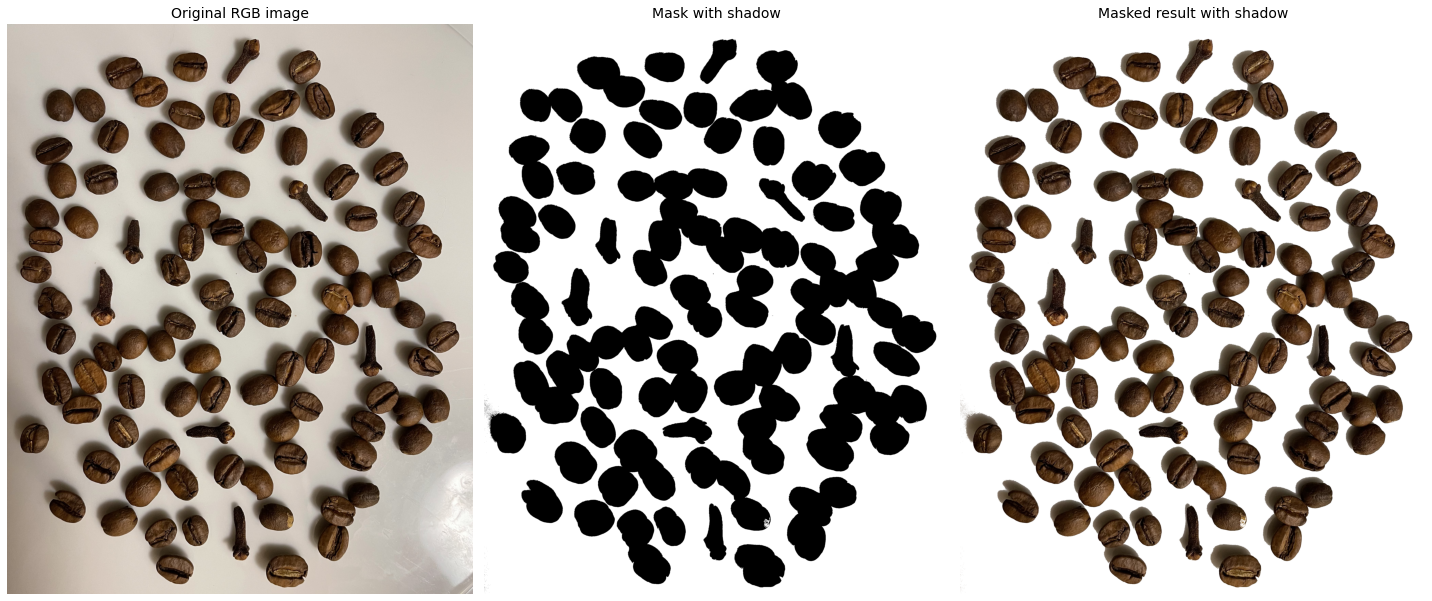

In [8]:
# Generating the masked image with shadows
shadow_masked_result = masking_image(image_RGB, mask_with_shadow)

#Displaying the masked results with shadow
display_mask_results(image_RGB, mask_with_shadow,shadow_masked_result, masking_type = "with shadow")

## Masking without shadow

In [9]:
# Function for displaying differnt color channels of the original image
def display_color_channel_images():
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 10))

    ax[0,0].imshow(img_l, cmap='gray')
    ax[0,0].set_title('Image L from LAB stack', fontsize = 12)

    ax[0,1].imshow(img_a, cmap='gray')
    ax[0,1].set_title('Image A from LAB stack', fontsize = 12)

    ax[0,2].imshow(img_b, cmap='gray')
    ax[0,2].set_title('Image B from LAB stack', fontsize = 12)

    ax[1,0].imshow(img_red, cmap='gray')
    ax[1,0].set_title('Image Red from RGB', fontsize = 12)

    ax[1,1].imshow(img_green, cmap='gray')
    ax[1,1].set_title('Image Green from RGB', fontsize = 12)

    ax[1,2].imshow(img_blue, cmap='gray')
    ax[1,2].set_title('Image Blue from RGB', fontsize = 12)

    for row in ax:
        for col in row:
            col.axis('off')

    fig.tight_layout()
    plt.show()

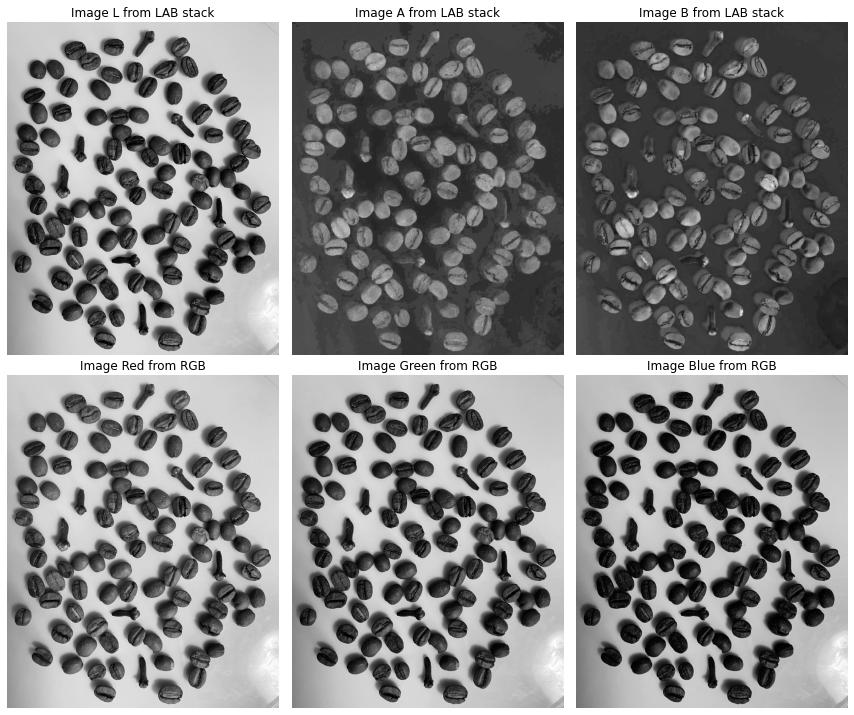

In [10]:
# Splitting the RGB color channels
img_red = image_RGB [:,:,0] # pull out the red channel
img_green = image_RGB [:,:,1] # pull out the green channel
img_blue = image_RGB [:,:,2] # pull out the blue channel

# Splitting the LAB Stack
img_lab = rgb2lab(image_RGB)# Converting from RGB to LAB stack
img_l = img_lab[:,:,0] # pull out L channel
img_a = img_lab[:,:,1] # pull out A channel
img_b = img_lab[:,:,2] # pull out B channel

# Displaying differnt color channels of the original image
display_color_channel_images()

In [11]:
# # Trying to find the best thresholding method for binarising the image (without shadows)
# fig, ax = try_all_threshold(img_a, figsize=(15, 14), verbose=False)
# plt.show()

In [12]:
# Creating mask without shadow

# Binarising the image using the Li filter
thresh = threshold_li(img_a)
binary_li = img_a > thresh

# Filling the holes of the objects in the binary image
# Step1: using remove_small_holes
inverted_binary_li = np.invert(binary_li)
holes_filled_without_shadow = remove_small_holes(inverted_binary_li, area_threshold = 500)

# Step2: using dilation & erosion
mask_without_shadow = np.invert(holes_filled_without_shadow.copy()) 
for _ in range(4):
    mask_without_shadow = dilation(mask_without_shadow, disk(3))
for _ in range(4):
    mask_without_shadow = erosion(mask_without_shadow, disk(1))

mask_without_shadow = remove_small_holes(mask_without_shadow, area_threshold = 800)    
mask_without_shadow = np.invert(mask_without_shadow)*1.0

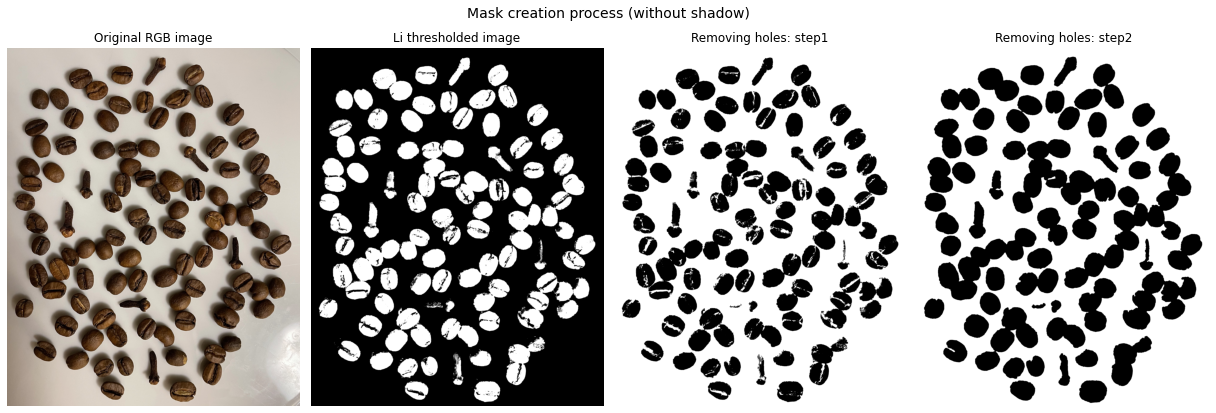

In [13]:
#Displaying the mask creation process (without shadow)
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (17, 6))
fig.suptitle("Mask creation process (without shadow)", fontsize = 14)

ax[0].imshow(image_RGB)
ax[0].set_title('Original RGB image', fontsize = 12)

ax[1].imshow(binary_li, cmap='gray')
ax[1].set_title("Li thresholded image", fontsize = 12)

ax[2].imshow(holes_filled_without_shadow, cmap='gray')
ax[2].set_title("Removing holes: step1", fontsize = 12)

ax[3].imshow(mask_without_shadow, cmap='gray')
ax[3].set_title("Removing holes: step2", fontsize = 12)

for row in ax:
    row.axis('off')

fig.tight_layout()
plt.show()

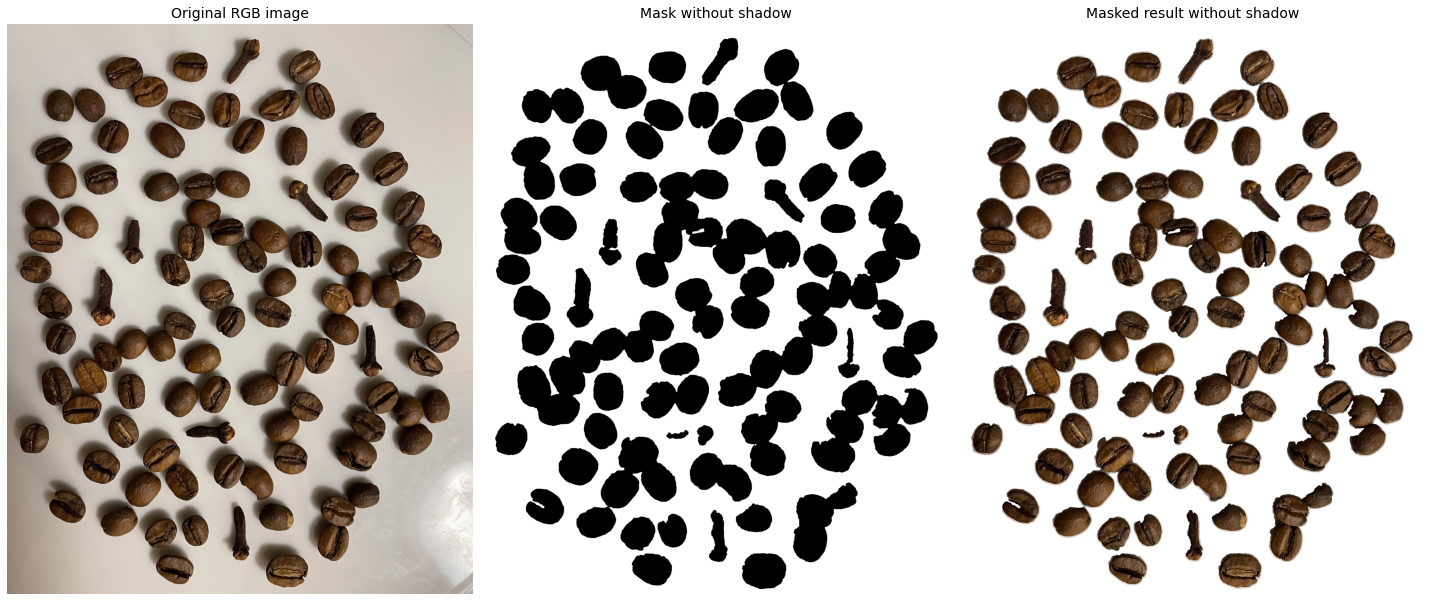

In [14]:
# Generating the masked image without shadows
without_shadow_masked_result = masking_image(image_RGB, mask_without_shadow)

#Displaying the masked results without shadow
display_mask_results(image_RGB, mask_without_shadow, without_shadow_masked_result, masking_type = "without shadow")

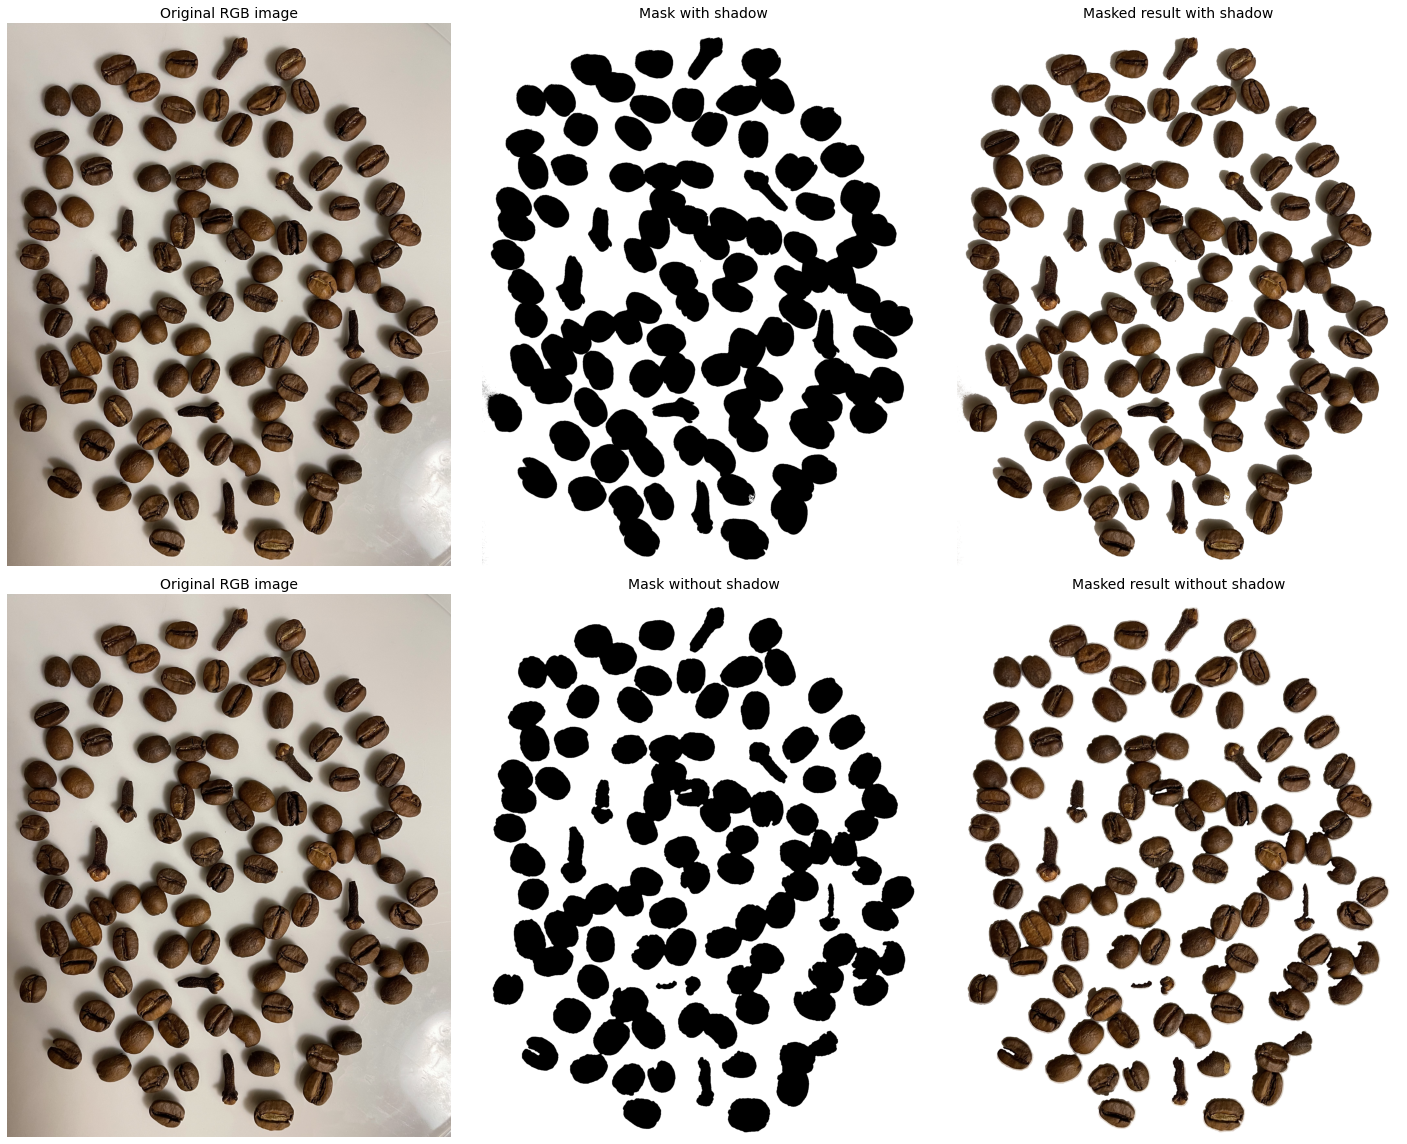

In [15]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 16))

ax[0, 0].imshow(image_RGB)
ax[0, 0].set_title('Original RGB image', fontsize = 14)

ax[0, 1].imshow(mask_with_shadow, cmap='gray')
ax[0, 1].set_title("Mask with shadow", fontsize = 14)

ax[0, 2].imshow(shadow_masked_result, cmap='gray')
ax[0, 2].set_title("Masked result with shadow" , fontsize = 14)

ax[1, 0].imshow(image_RGB)
ax[1, 0].set_title('Original RGB image', fontsize = 14)

ax[1, 1].imshow(mask_without_shadow, cmap='gray')
ax[1, 1].set_title("Mask without shadow", fontsize = 14)

ax[1, 2].imshow(without_shadow_masked_result, cmap='gray')
ax[1, 2].set_title("Masked result without shadow" , fontsize = 14)

for row in ax:
    for col in row:
        col.axis('off')

fig.tight_layout()
plt.show()

## COunt Beans

In [16]:
def show_image(image, label ="Image:", size=(6,2), cmap='viridis'):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize=size)
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap=cmap) 
    plt.axis('off')
    plt.show()

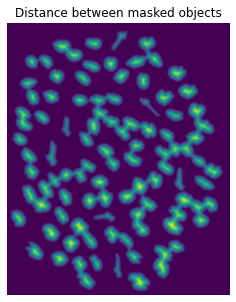

In [17]:
#watershed to sepratae objects

#Step1: Generating the Distance map for understanding the distance between the masked objects
distance = ndi.distance_transform_edt(holes_filled_with_shadow) 
show_image(distance, "Distance between masked objects", (12,5))

In [18]:
import warnings #To ignore a futurewarning about indices
warnings.simplefilter(action ='ignore', category=FutureWarning)

No of objects detected: 110


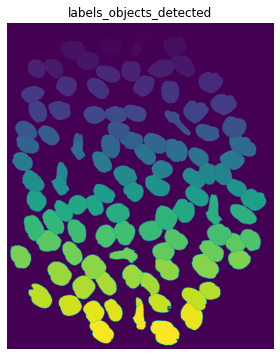

Amount of objects in image: 109


In [19]:
# Step2: Using the watershed for separating the merged objects
# After trying out differnt min_distances, chose 90 as the optimal value. It ensures that local peaks are not to close. Thus helps in the separation of the very close beans.
local_maxi = peak_local_max(distance, 
                            min_distance = 90, 
                            indices = False, 
                            footprint = np.ones((26,26)), 
                            labels = holes_filled_with_shadow.astype(int))
markers = ndi.label(local_maxi)[0]
labels_objects_detected = watershed(-distance, markers, mask = holes_filled_with_shadow, watershed_line = True)
print("No of objects detected:", len(np.unique(labels_objects_detected)))
show_image(labels_objects_detected, "labels_objects_detected", (10,6))

# Measuring the properties of the objects detected
labels2 = measure.label(labels_objects_detected)
properties = measure.regionprops(labels2)
print(f'Amount of objects in image: {len(properties)}')

In [20]:
# Finding the beans
truncated_beans = [prop for prop in properties if (prop.eccentricity<=0.901 and prop.area>=25000 
                                                           and prop.major_axis_length >= 100)]

print("Number of beans:", len(truncated_beans))

image_beans = holes_filled_with_shadow[:,:]*1

for obj in truncated_beans:
    for coord in obj.coords:
#         print("obj.coords", len(obj.coords), "coord", len(coord))
        image_beans[coord[0], coord[1]] = 2
        
        
        
# for prop in truncated_beans:
#     x, y = prop.coords # unpacking the centroids for minimizing the decimal points
#     bean_locations.append((round(x, 2), round(y, 2)))
show_image(image_beans, "Beans", (12,5))

Number of beans: 93
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.c

obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2
obj.coords 36948 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2
obj.coords 33149 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2
obj.coords 36158 coord 2


KeyboardInterrupt: 

In [ ]:
#Adding red rectangles around beans
rectangles = []

# Finding the points for making the rectangle
for obj in truncated_beans:
    X_values = []
    Y_values = []
    for coord in obj.coords:
        X_values.append(coord[0])
        Y_values.append(coord[1])
    min_x = min(X_values) 
    min_y = min(Y_values)
    max_x = max(X_values)
    max_y = max(Y_values)
    rectangles.append((min_y, min_x, max_y-min_y, max_x-min_x,))

 # Displaying the detected beans with rectangle patches   
plt.subplots(1,1,figsize=(25, 22))
for rec in rectangles:
    plt.gca().add_patch(Rectangle(xy= (rec[0],rec[1]), width = rec[2], height = rec[3], 
                                  edgecolor ='red', facecolor ='none', linewidth = 2))

plt.imshow(image_RGB , cmap='gray')
plt.title(label = "Beans detected", fontsize=14)
plt.axis('off')
plt.show()